---
layout: post
title: OpenCV Corner Detection
---

# OpenCV Tutorial on Image Corner Detection

Let's upload libraries...

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Resized Dimensions :  (734, 979, 3)
Original Dimensions :  (2448, 3264, 3)


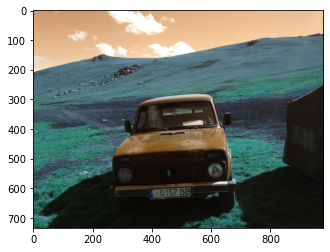

In [25]:
# reading the file
filename = 'jailoo.jpeg'
img = cv2.imread(filename)

scale_percent = 30 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
print('Original Dimensions : ',img.shape)

plt.imshow(resized);

Helper function to display our precessed image

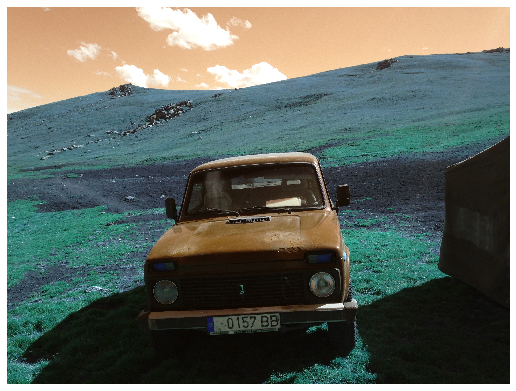

In [28]:
def plti(im, h=12, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
plti(img)

The image is resized, and its aspect ratio is kept as original. Now we will try to extract **features** from the picture.

## So, what is a feature?

Feature is a piece of an information that is relevant to computational problem related to certain application. 

Referece: <a href='https://en.wikipedia.org/wiki/Feature_(computer_vision)'>Computer Vision </a> 

Features of an image are corners, edges, objects and points.

## Harris Corner Detection

This technique is used to find "corners" in images. The idea behind the Harris method is to detect points based on the intensity variation in a local neighborhood: a small region around the feature should show a large intensity change when compared with windows shifted in any direction.  

Reference: <a href='http://www.ipol.im/pub/art/2018/229/article_lr.pdf'>An Analysis and Implementation of the Harris Corner Detector </a>

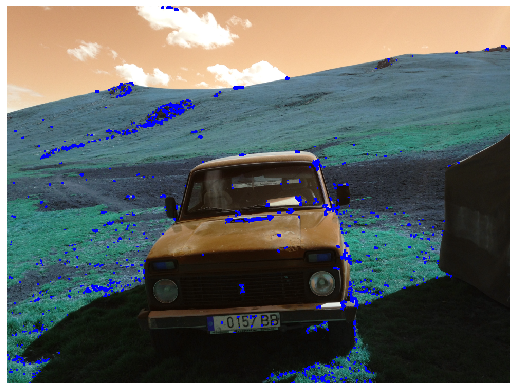

In [29]:
gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
resized[dst>0.01*dst.max()]=[0,0,255]

plti(resized)

### Here we will find 10,000 best corners Shi-Tomasi Corner Detector

The Harris corner detector has a corner selection criteria. A score is calculated for each pixel, and if the score is above a certain value, the pixel is marked as a corner. The score is calculated using two eigenvalues. That is, you gave the two eigenvalues to a function. The function manipulates them, and gave back a score.

**Shi and Tomasi** suggested that the function should be done away with. Only the eigenvalues should be used to check if the pixel was a corner or not.

Reference: <a href ='https://aishack.in/tutorials/shitomasi-corner-detector/>Fundamentals of Features and Corners



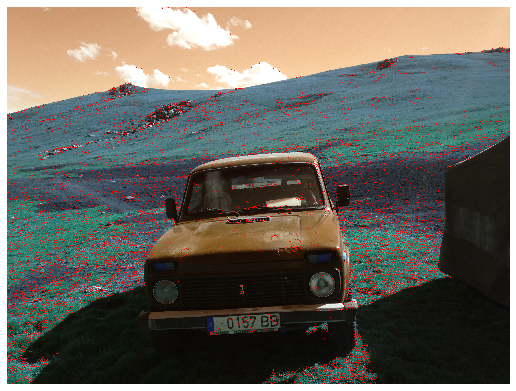

In [37]:
img = cv2.imread('jailoo.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,10000,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plti(img)